In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [3]:
df=pd.read_csv('ds_salaries.csv')
df.head(10)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
6,6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S
7,7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
8,8,2020,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US,L
9,9,2020,SE,FT,Lead Data Engineer,125000,USD,125000,NZ,50,NZ,S


In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
for col in df.columns:
    print(df[col].value_counts())
    print('*'*20)
    

2022    318
2021    217
2020     72
Name: work_year, dtype: int64
********************
SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64
********************
FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64
********************
Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   

<AxesSubplot:>

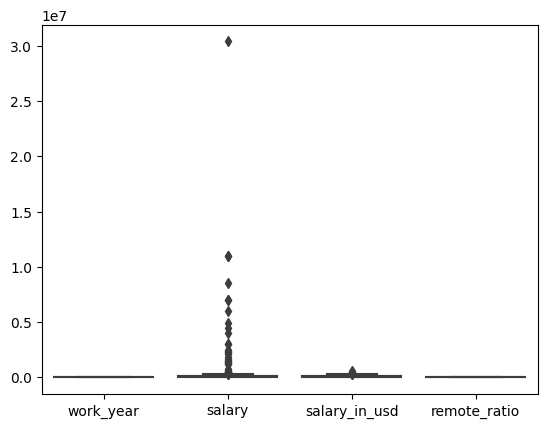

In [6]:
sns.boxplot(df)

In [7]:
df['job_title'].unique()

array(['Data Scientist', 'Machine Learning Scientist',
       'Big Data Engineer', 'Product Data Analyst',
       'Machine Learning Engineer', 'Data Analyst', 'Lead Data Scientist',
       'Business Data Analyst', 'Lead Data Engineer', 'Lead Data Analyst',
       'Data Engineer', 'Data Science Consultant', 'BI Data Analyst',
       'Director of Data Science', 'Research Scientist',
       'Machine Learning Manager', 'Data Engineering Manager',
       'Machine Learning Infrastructure Engineer', 'ML Engineer',
       'AI Scientist', 'Computer Vision Engineer',
       'Principal Data Scientist', 'Data Science Manager', 'Head of Data',
       '3D Computer Vision Researcher', 'Data Analytics Engineer',
       'Applied Data Scientist', 'Marketing Data Analyst',
       'Cloud Data Engineer', 'Financial Data Analyst',
       'Computer Vision Software Engineer',
       'Director of Data Engineering', 'Data Science Engineer',
       'Principal Data Engineer', 'Machine Learning Developer',
       

# 1) find the max and  min price according to experience

In [8]:
min=df.groupby('experience_level',as_index=False)['salary_in_usd'].min()
min=min.rename(columns={'salary_in_usd':'min_salary_in_usd'})
max=df.groupby('experience_level',as_index=False)['salary_in_usd'].max()
max=max.rename(columns={'salary_in_usd':'max_salary_in_usd'})
a=min.merge(max,how='inner',on='experience_level')
a

,experience_level,min_salary_in_usd,max_salary_in_usd
0,EN,4000,250000
1,EX,69741,600000
2,MI,2859,450000
3,SE,18907,412000


# 2) find the different in salary between remote and office job 

In [9]:
df['remote_ratio']=df['remote_ratio'].astype(object)

In [10]:
df['remote']=np.nan
for i in range(len(df)):
    if df['remote_ratio'][i]==0:
      if pd.isna(df['remote'][i]):
            df['remote'][i]='OFE'
    elif df['remote_ratio'][i]==50:
      if pd.isna(df['remote'][i]):
            df['remote'][i]='HYB'
    else: 
      if pd.isna(df['remote'][i]):
            df['remote'][i]='RMT'

df['remote']

C:\Users\sagar_singh\AppData\Local\Temp\ipykernel_10472\1355833576.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['remote'][i]='OFE'


0      OFE
1      OFE
2      HYB
3      OFE
4      HYB
      ... 
602    RMT
603    RMT
604    OFE
605    RMT
606    RMT
Name: remote, Length: 607, dtype: object

In [11]:
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,remote
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,OFE
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,OFE
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,HYB
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,OFE
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,HYB
5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L,RMT
6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S,RMT
7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L,HYB
8,2020,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US,L,RMT
9,2020,SE,FT,Lead Data Engineer,125000,USD,125000,NZ,50,NZ,S,HYB


In [12]:
df['remote'].unique()

array(['OFE', 'HYB', 'RMT'], dtype=object)

In [13]:
df.groupby('remote')['salary'].describe()

,count,mean,std,min,25%,50%,75%,max
remote,,,,,,,,
HYB,99.0,708018.171717,2.100784e+06,8000.0,52250.0,76760.0,151500.0,11000000.0
OFE,127.0,218147.842520,5.595259e+05,4000.0,68300.0,102100.0,162040.0,4900000.0
RMT,381.0,259499.902887,1.585939e+06,4000.0,80000.0,123000.0,167000.0,30400000.0


#  3) find  the salary difference between Machine Learning Engineer and Lead Machine Learning Engineer

In [14]:
df1=df.where(df['job_title']=='Machine Learning Engineer' )
df2=df.where(df['job_title']== 'Lead Machine Learning Engineer')
df3=pd.concat([df1,df2])
df3.dropna()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,remote
4,2020.0,SE,FT,Machine Learning Engineer,150000.0,USD,150000.0,US,50,US,L,HYB
20,2020.0,MI,FT,Machine Learning Engineer,299000.0,CNY,43331.0,CN,0,CN,M,OFE
37,2020.0,EN,FT,Machine Learning Engineer,250000.0,USD,250000.0,US,50,US,L,HYB
39,2020.0,EN,FT,Machine Learning Engineer,138000.0,USD,138000.0,US,100,US,S,RMT
64,2020.0,SE,FT,Machine Learning Engineer,40000.0,EUR,45618.0,HR,100,HR,S,RMT
83,2021.0,MI,FT,Machine Learning Engineer,40000.0,EUR,47282.0,ES,100,ES,S,RMT
110,2021.0,SE,FT,Machine Learning Engineer,80000.0,EUR,94564.0,DE,50,DE,L,HYB
128,2021.0,EN,FT,Machine Learning Engineer,20000.0,USD,20000.0,IN,100,IN,S,RMT
145,2021.0,SE,FT,Machine Learning Engineer,70000.0,EUR,82744.0,BE,50,BE,M,HYB
159,2021.0,EN,FT,Machine Learning Engineer,125000.0,USD,125000.0,US,100,US,S,RMT


<AxesSubplot:xlabel='job_title'>

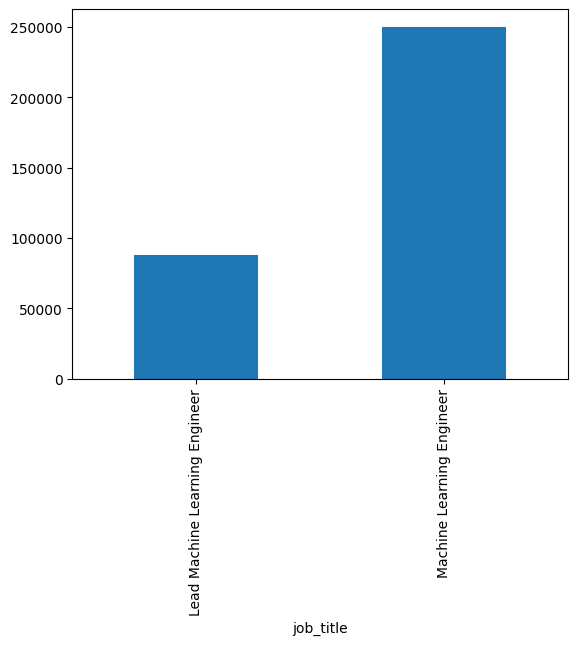

In [15]:
df3.groupby('job_title')['salary_in_usd'].max().plot(kind='bar')

 #  4) salary difference between Data Analyst and Data Scientist

In [16]:
df4=df.where(df['job_title']=='Data Analyst' )
df5=df.where(df['job_title']== 'Data Scientist')
df6=pd.concat([df4,df5])
df6.dropna()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,remote
5,2020.0,EN,FT,Data Analyst,72000.0,USD,72000.0,US,100,US,L,RMT
14,2020.0,MI,FT,Data Analyst,85000.0,USD,85000.0,US,100,US,L,RMT
15,2020.0,MI,FT,Data Analyst,8000.0,USD,8000.0,PK,50,PK,L,HYB
34,2020.0,MI,FT,Data Analyst,41000.0,EUR,46759.0,FR,50,FR,L,HYB
38,2020.0,EN,FT,Data Analyst,10000.0,USD,10000.0,NG,100,NG,S,RMT
...,...,...,...,...,...,...,...,...,...,...,...,...
592,2022.0,SE,FT,Data Scientist,230000.0,USD,230000.0,US,100,US,M,RMT
593,2022.0,SE,FT,Data Scientist,150000.0,USD,150000.0,US,100,US,M,RMT
596,2022.0,SE,FT,Data Scientist,210000.0,USD,210000.0,US,100,US,M,RMT
598,2022.0,MI,FT,Data Scientist,160000.0,USD,160000.0,US,100,US,M,RMT


<AxesSubplot:xlabel='job_title'>

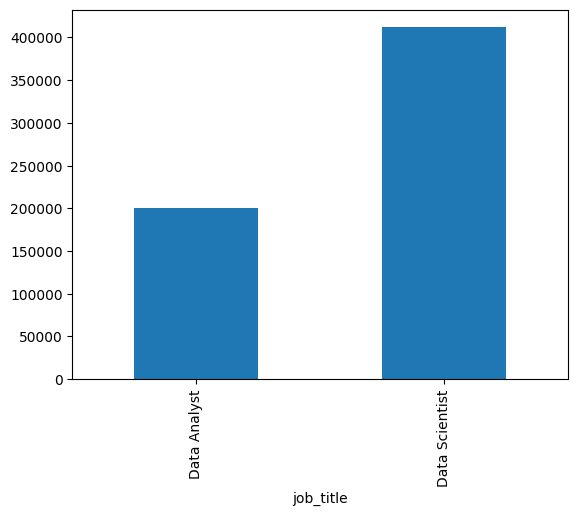

In [17]:
df6.groupby('job_title')['salary_in_usd'].max().plot(kind='bar')

# 5) salary changes according to the year

<AxesSubplot:xlabel='work_year'>

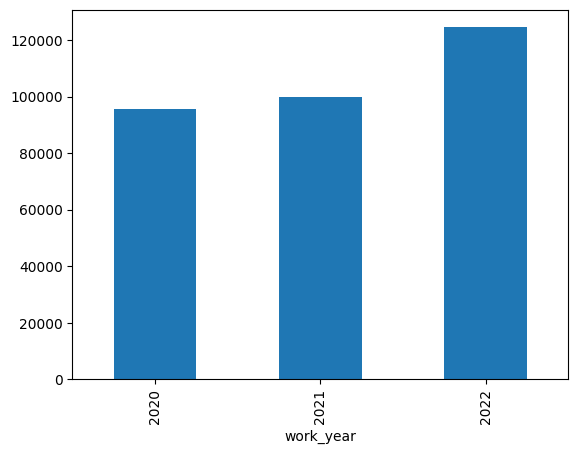

In [18]:
df.groupby('work_year')['salary_in_usd'].mean().plot(kind='bar')

#  6) highest paid jobs

Text(0, 0.5, '')

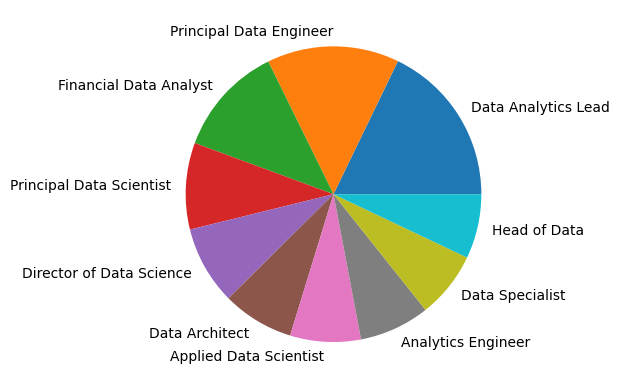

In [19]:
ax=df.groupby('job_title')['salary_in_usd'].mean().nlargest(10).plot(kind='pie')
ax.set_ylabel('')

# 7) salary according to company size

<AxesSubplot:xlabel='company_size'>

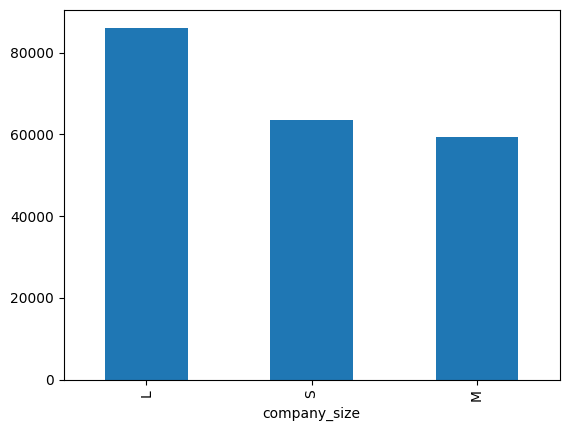

In [20]:
df.groupby('company_size')['salary_in_usd'].std().nlargest(10).plot(kind='bar')

# 8) salary according to job type like full/half time ,intern etc.|

<AxesSubplot:ylabel='salary_in_usd'>

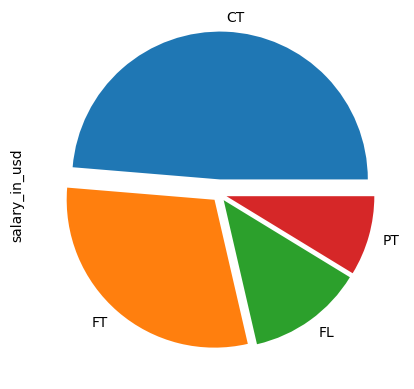

In [21]:
df.groupby('employment_type')['salary_in_usd'].mean().nlargest(10).plot.pie(explode=(0.1,0.05,0.05,0.05))

#  9) salary according to place they lived in

<AxesSubplot:xlabel='employee_residence'>

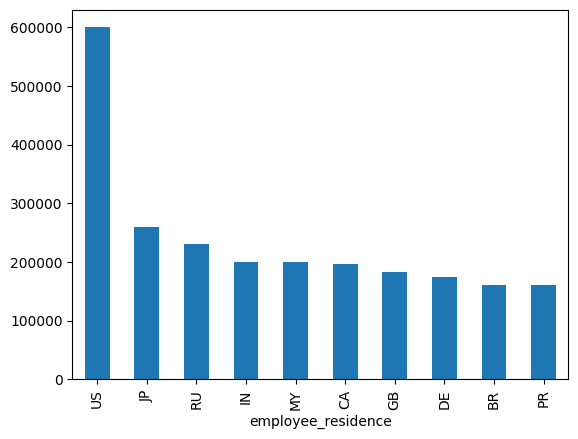

In [22]:
df.groupby('employee_residence')['salary_in_usd'].max().nlargest(10).plot(kind='bar')

# 10) how many large company provide wfh

In [23]:
df.groupby('remote')['company_size'].count()

remote
HYB     99
OFE    127
RMT    381
Name: company_size, dtype: int64

In [24]:
df['size']=np.nan
for i in range(len(df)):
    if df['company_size'][i]=='L':
      if pd.isna(df['size'][i]):
            df['size'][i]='Large'
    elif df['company_size'][i]=='M':
      if pd.isna(df['size'][i]):
            df['size'][i]=np.nan
    else: 
      if pd.isna(df['size'][i]):
            df['size'][i]=np.nan

C:\Users\sagar_singh\AppData\Local\Temp\ipykernel_10472\489183358.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['size'][i]='Large'


In [25]:
df['size']

0      Large
1        NaN
2        NaN
3        NaN
4      Large
       ...  
602      NaN
603      NaN
604      NaN
605      NaN
606    Large
Name: size, Length: 607, dtype: object

In [27]:
df4=df.where(df['remote']=='RMT')
df5=df.where( df['remote']=='HBD')
df6=pd.concat([df4,df5])
df6.dropna(inplace=True)
a=df['size'].count()
b=df6['remote'].count()
percent=b*100/a
print(round(percent,2),'%')
df6

53.54 %


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,remote,size
5,2020.0,EN,FT,Data Analyst,72000.0,USD,72000.0,US,100,US,L,RMT,Large
8,2020.0,MI,FT,Business Data Analyst,135000.0,USD,135000.0,US,100,US,L,RMT,Large
13,2020.0,MI,FT,Lead Data Analyst,87000.0,USD,87000.0,US,100,US,L,RMT,Large
14,2020.0,MI,FT,Data Analyst,85000.0,USD,85000.0,US,100,US,L,RMT,Large
21,2020.0,MI,FT,Product Data Analyst,450000.0,INR,6072.0,IN,100,IN,L,RMT,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,2022.0,SE,FT,Applied Data Scientist,380000.0,USD,380000.0,US,100,US,L,RMT,Large
523,2022.0,SE,FT,Data Analytics Lead,405000.0,USD,405000.0,US,100,US,L,RMT,Large
524,2022.0,MI,FT,Data Scientist,135000.0,USD,135000.0,US,100,US,L,RMT,Large
525,2022.0,SE,FT,Applied Data Scientist,177000.0,USD,177000.0,US,100,US,L,RMT,Large


Text(0.5, 1.0, 'Large Companies which have remote jobs')

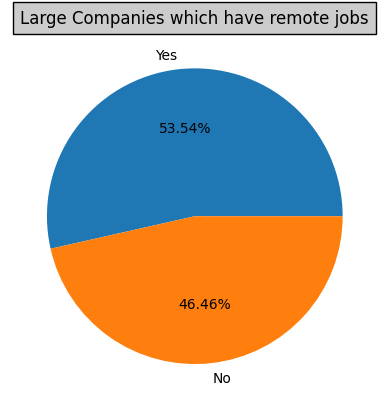

In [30]:
plt.pie([b,a-b],labels=['Yes','No'],autopct='%.2f%%')
plt.title('Large Companies which have remote jobs',bbox={'facecolor':'0.8', 'pad':5})